# Objetivo: prever a classe da flor com base nas features disponíveis

## Importação das bibliotecas básicas

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [159]:
import warnings
warnings.filterwarnings('ignore')

## Importando os dados para um dataset e operações básicas para exame

In [160]:
dataset = pd.read_csv("iris.csv")

In [161]:
dataset.head()

,sepal_lenght,sepal_width,petal_lenght,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [162]:
dataset.describe().round(3)

,sepal_lenght,sepal_width,petal_lenght,petal_width
count,150.000,150.000,150.000,150.000
mean,5.843,3.054,3.759,1.199
std,0.828,0.434,1.764,0.763
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


## Matriz de correlação em que se pode observar alguns elementos:

In [163]:
dataset.corr()

,sepal_lenght,sepal_width,petal_lenght,petal_width
sepal_lenght,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_lenght,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


- Os comprimentos de sépalas (sepal_lenght) tem alta correlação (crescimento linear semelhante) com o comprimento e largura de pétalas (pental_lenght, pental_width) e tende a ser positivo (cresce em sentido positivo, coeficiente linar - a > 0).
- As larguras de sépalas (sepal_width) tem menor correlação (crescimento linear semelhante) com o comprimento e largura de pétalas (pental_lenght, pental_width) e tende a ser negativo (cresce em sentido negativo, coeficiente linear - a < 0).

### Renomeando os nomes das classes para valores numérios
### (auxiliar durante a aplicação de Machine Learning)

In [164]:
new_class = {}
for i, c in enumerate(dataset["class"].unique()):
    new_class[c] = i

dataset['class'].replace(new_class, inplace=True)
dataset.head()

,sepal_lenght,sepal_width,petal_lenght,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Vizualização de dados: hora de buscar as melhores features para a predição!

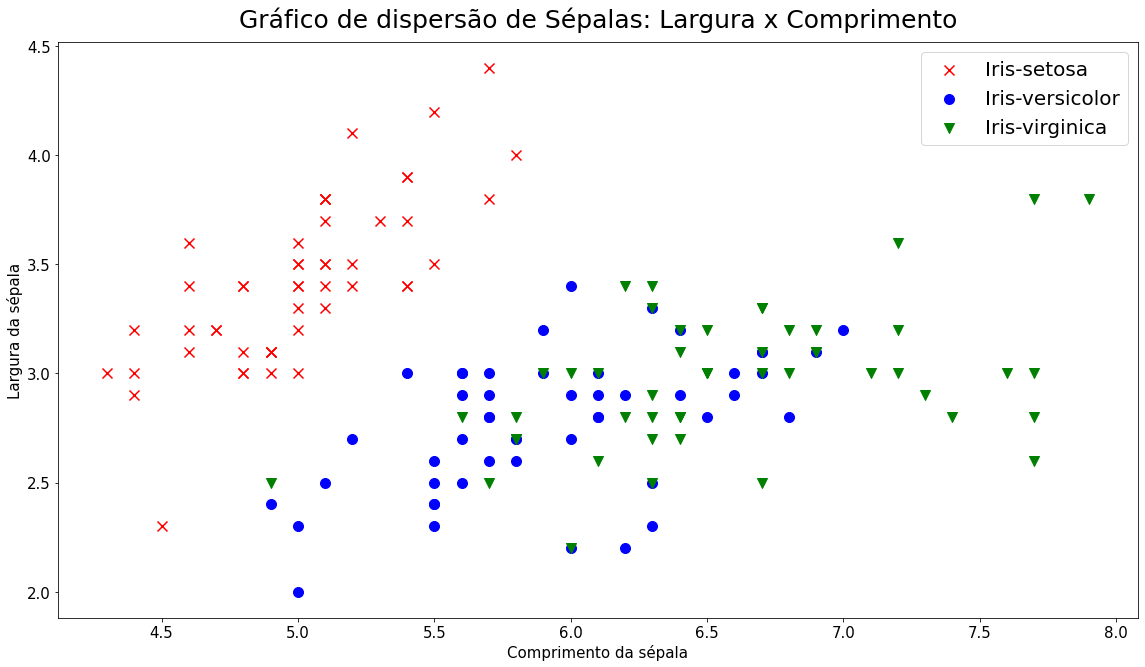

In [165]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0,0,1,1])

cores = {0: 'r', 1: 'b', 2: 'g'}
marcadores = {0: 'x', 1: 'o', 2: 'v'}

for especie in dataset['class'].unique():
    tmp = dataset[dataset['class'] == especie]
    eixo.scatter(tmp['sepal_lenght'], tmp['sepal_width'],
                 color=cores[especie], marker=marcadores[especie],
                 s=100)

eixo.set_title('Gráfico de dispersão de Sépalas: Largura x Comprimento', fontsize=25, pad=15)
eixo.set_xlabel('Comprimento da sépala', fontsize=15)
eixo.set_ylabel('Largura da sépala', fontsize=15)
eixo.tick_params(labelsize=15)
eixo.legend({'Iris-setosa': 'r', 'Iris-versicolor': 'b', 'Iris-virginica': 'g'}, fontsize=20)


 - Na vizualização acima, pode-se observar um grupo bem definido de iris-setosas, contudo, uma certa mistura entre as iris-versicolor e as iris-virginicas, o que poderia causar problemas ou dificuldades durante uma possível predição utilizando essas duas variáveis - a largura e o comprimento das sépalas - como explicativas para a classificação 

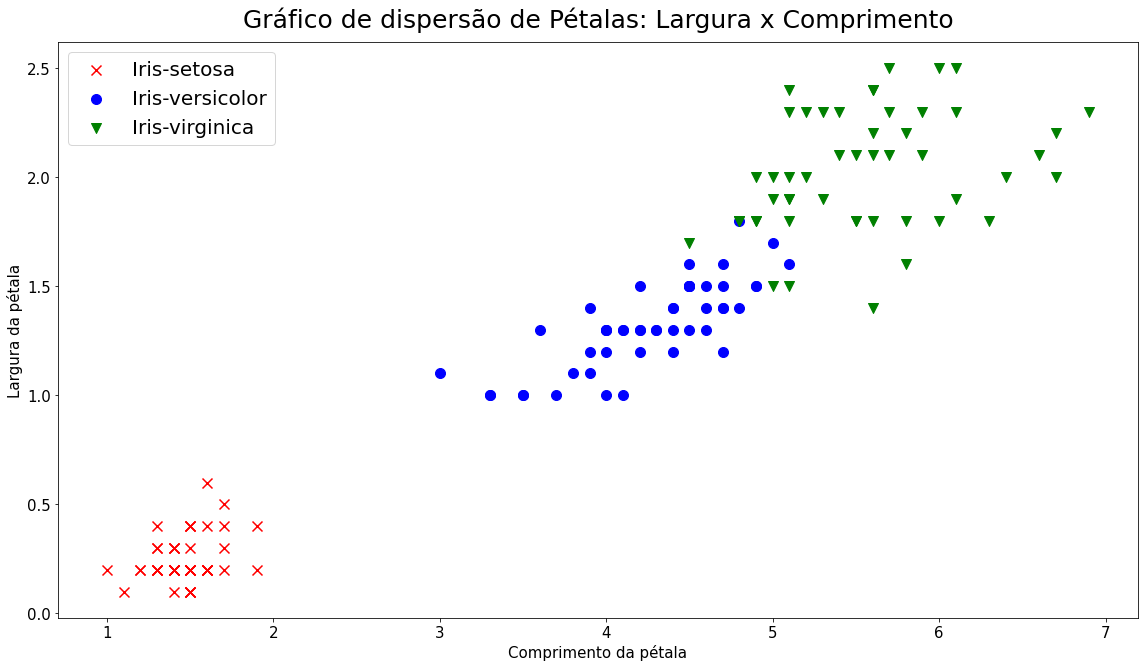

In [166]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0,0,1,1])

cores = {0: 'r', 1: 'b', 2: 'g'}
marcadores = {0: 'x', 1: 'o', 2: 'v'}

for especie in dataset['class'].unique():
    tmp = dataset[dataset['class'] == especie]
    eixo.scatter(tmp['petal_lenght'], tmp['petal_width'],
                 color=cores[especie], marker=marcadores[especie],
                 s=100)

eixo.set_title('Gráfico de dispersão de Pétalas: Largura x Comprimento', fontsize=25, pad=15)
eixo.set_xlabel('Comprimento da pétala', fontsize=15)
eixo.set_ylabel('Largura da pétala', fontsize=15)
eixo.tick_params(labelsize=15)
eixo.legend({'Iris-setosa': 'r', 'Iris-versicolor': 'b', 'Iris-virginica': 'g'}, fontsize=20)


- Nessa vizualização, por outro lado, utilizando o comprimento e a largura das pétalas como variáveis explicativas, pode-se observar com mais clareza a formação de grupos bem definidos de Iris-setosas, Iris-versicolor e Iris-virginicas. Em virtude disso, utilizaremos esses dois parâmetros - largura de pétalas e comprimento de pétalas - como variáveis explicativas do modelo preditivo para classificação de tipos de flor.

# Importanto as principais bibliotecas para uso de Machine Learning

In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [168]:
X = dataset[["petal_lenght", "petal_width"]]
Y = dataset[["class"]]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

## Utilizaremos a técnica de Regressão Logística para esse problema
- Observação: embora essa técnica seja mais comumente utilizada em casos binários de classificação (exemplo .: determinada transação bancária é real ou não), ela continua funcionando devido ao seu background probabilístico para estimar qual o tipo de classificação de flor

In [169]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [170]:
previsto = model.predict(x_test)
precisao = accuracy_score(y_test, previsto)

print(f'Potuação de precisão com os dados de teste: {precisao * 100:.2f}%')


Potuação de precisão com os dados de teste: 96.67%


### Por fim, conseguimos um ótimo resultado. Score próximo de 97%! O objetivo foi concluido com sucesso!